In [454]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
import random

## Realisierungen des Spiels

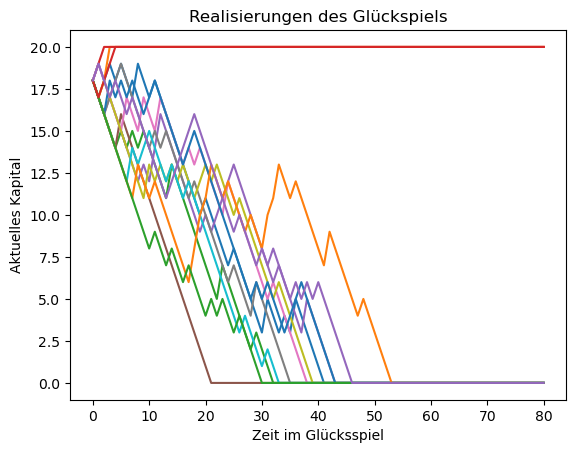

In [572]:
p=1/16

values = [2, 1, -1]
probabilities = [p, 3*p, 1-4*p] 


def path(n, x0, N):
    x=[x0]
    for i in range(n):
        if x[-1]==0:
            x=np.append(x, 0)
        elif x[-1]==N or x[-1]==N+1:
            x=np.append(x, N)
        else:
            sample=np.random.choice(values, p=probabilities)
            x=np.append(x, x[-1]+sample)
    return x


# Einige Male eine Realisierung durchspielen und plotten
for i in range(15):
    plt.plot(path(80, 18, 20))

plt.xlabel('Zeit im Glücksspiel')
plt.ylabel('Aktuelles Kapital')
plt.title('Realisierungen des Glückspiels')
plt.show()


## Ruinwahrscheinlichkeit

Experiment 0.788
Theoretischer Wert 0.7777784268066736


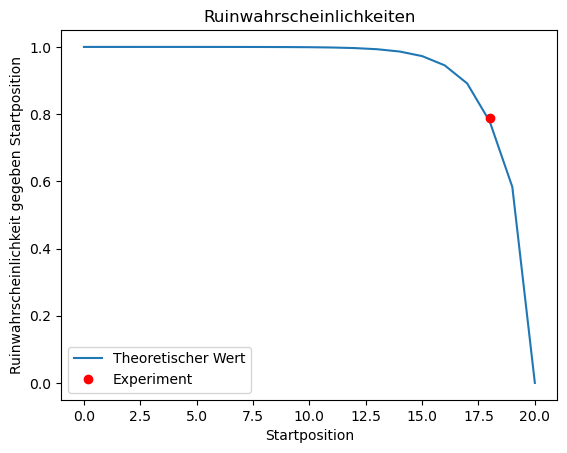

18


In [598]:
#Bei einer gegeben Zahl an Durchläufen, zähle wie häufig wir ins Verlustszenario kommen
loss=0
k=18
N=20
m=1000
for i in range(m):
    x=path(200, k, N)
    if x[-1]==0:
        loss=loss+1
    else:
        loss=loss
    
print('Experiment', loss/m)

# Theoretisch berechnet



fl=(-8*(-6)**N+7*(-3)**N*2**k+(-6)**k)/(1+7*(-3)**N-8*(-6)**N)
print('Theoretischer Wert', fl)
f=np.zeros(N+1)
for i in range(N+1):
    
    f[i]=(-8*(-6)**N+7*(-3)**N*2**i+(-6)**i)/(1+7*(-3)**N-8*(-6)**N)

plt.plot(range(N+1), f, label='Theoretischer Wert')
plt.plot(k, loss/m, 'ro', label='Experiment')
plt.xlabel('Startposition')
plt.ylabel('Ruinwahrscheinlichkeit gegeben Startposition')
plt.title('Ruinwahrscheinlichkeiten')
plt.legend()
plt.show()
print(k)

## Wie lange dauert das Spiel?

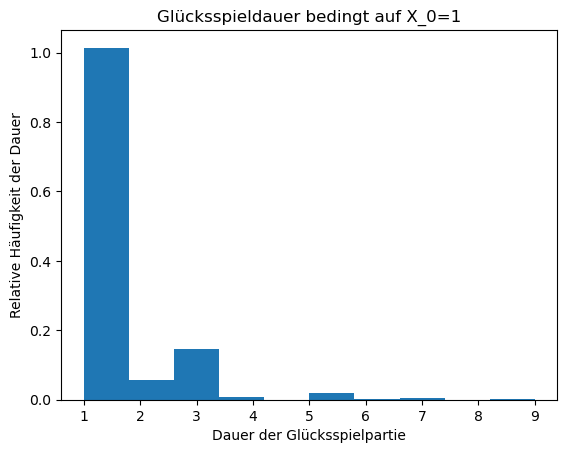

Bedingte Erwartung via Experiment 1.3902


In [590]:
#Anfangskapital
k=1
def first_special_index(x):
    for i, val in enumerate(x):
        if val in (0, 3, 4):
            return i
    return None 


stop=np.zeros(5000)
for i in range(5000):
    x=path(10, k, 3)
    stop[i]=first_special_index(x)

plt.hist(stop,  density=True)
plt.xlabel('Dauer der Glücksspielpartie')
plt.ylabel('Relative Häufigkeit der Dauer')
plt.title(f'Glücksspieldauer bedingt auf X_0={k}')
plt.show()

print('Bedingte Erwartung via Experiment', np.mean(stop))
